# Aim:
Develop, train, and evaluate a Long Short-Term Memory (LSTM) Recurrent Neural Network (RNN) model for sequential data, applied specifically to predicting stock prices.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
train_data = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
test_data = pd.read_csv('/content/tatatest.csv')

train_close_prices = train_data['Close'].values.reshape(-1, 1)
test_close_prices = test_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_close_prices)

In [ ]:
#range length as 0 to 60 for predicted 61 and so on 
sequence_length = 60
X_train = []
y_train = []

for i in range(sequence_length, len(train_scaled)):
    X_train.append(train_scaled[i-sequence_length:i, 0])
    y_train.append(train_scaled[i, 0])

In [ ]:
X_train.shape

(1975, 60, 1)

In [ ]:
y_train.shape

(1975,)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 8.0649e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - loss: 7.9931e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 6.3640e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 6.9692e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 5.9270e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 7.4647e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 6.5257e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 7.3839e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 5.9282e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 6.5621e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 5.9267e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 7.5220e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 8.3726e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 7.53

In [ ]:
total_data = np.concatenate((train_close_prices, test_close_prices), axis=0)
inputs = total_data[len(total_data) - len(test_data) - sequence_length:]
inputs = scaler.transform(inputs.reshape(-1, 1))

X_test = []
for i in range(sequence_length, len(inputs)):
    X_test.append(inputs[i-sequence_length:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


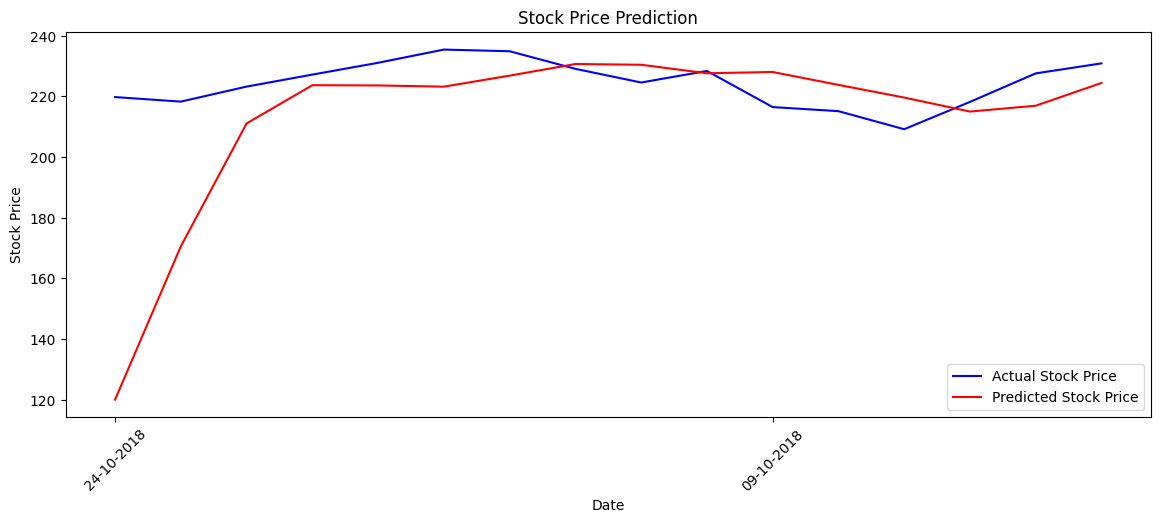

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(test_data['Date'], test_close_prices, color="blue", label="Actual Stock Price")
plt.plot(test_data['Date'], predicted_prices, color="red", label="Predicted Stock Price")
plt.xticks(np.arange(0, len(test_data['Date']), step=10), rotation=45)
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
print(predicted_prices)

[[120.09007]
 [170.59694]
 [211.10297]
 [223.70515]
 [223.62662]
 [223.22688]
 [226.85611]
 [230.69115]
 [230.44579]
 [227.64249]
 [228.06075]
 [223.81169]
 [219.63591]
 [215.01831]
 [216.94499]
 [224.43787]]
